Project 2 - Part 2 (Core)

Your second project is going to have a lot more freedom than your first project. This is because we want you to have a project in your portfolio that interests you or relates to the industry you would like to work in.

Your task for this week is to start cleaning and exploring the data you selected last week. Make sure to check the quality of the data - do you need to deal with missing values? Are there any outliers? Etc. Also start exploring your data - look for trends, create visualizations, etc.

If you have not already done so, make sure to create a GitHub repository for this project. Commit your data and any work you do on data cleaning to the repository.

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC (Fine Fuel Moisture Code) index from the FWI system: 18.7 to 96.20
6. DMC - DMC (Duff Moisture Code) index from the FWI system: 1.1 to 291.3
7. DC - DC (Drought Code) index from the FWI system: 7.9 to 860.6
8. ISI - (Initial Spead Index) ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [22]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/PandasForDataManipulation/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [24]:
df.shape

(517, 13)

In [25]:
df.isnull().count()

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
area     517
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fd92a0390>,
      dtype=object)

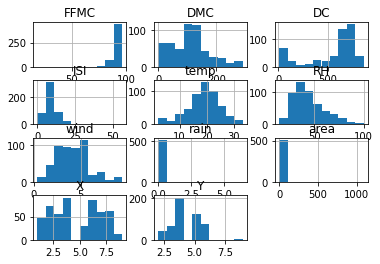

In [33]:
df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'X', 'Y']].hist()

<BarContainer object of 517 artists>

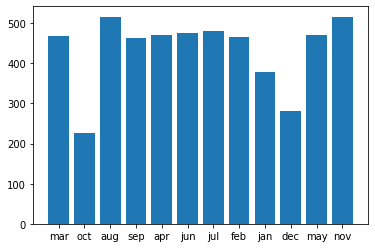

In [31]:
plt.bar(df['month'].values, df['month'].index)

<BarContainer object of 517 artists>

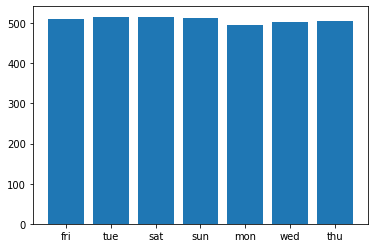

In [32]:
plt.bar(df['day'].values, df['day'].index)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


{'boxes': [<matplotlib.lines.Line2D at 0x7f8fc9e11050>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8fc9e17050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8fc9e1f090>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8fc9e17b10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8fc9e11590>,
  <matplotlib.lines.Line2D at 0x7f8fc9dede90>]}

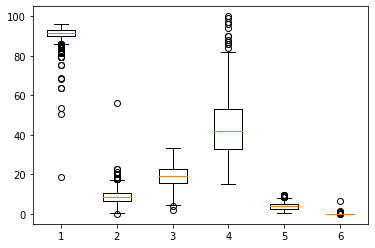

In [52]:
# plt.boxplot(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'])
plt.boxplot([df['FFMC'], df['ISI'], df['temp'], df['RH'], df['wind'], df['rain']])

{'boxes': [<matplotlib.lines.Line2D at 0x7f8fc9bd8250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8fc9bdd250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8fc9be5290>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8fc9bddd10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8fc9bd8790>,
  <matplotlib.lines.Line2D at 0x7f8fc9b81550>]}

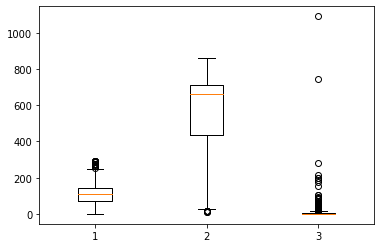

In [56]:
plt.boxplot([df['DMC'], df['DC'], df['area']])


{'boxes': [<matplotlib.lines.Line2D at 0x7f8fc9adabd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8fc9ae2bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8fc9ae9c10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8fc9ae96d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8fc9ae2150>,
  <matplotlib.lines.Line2D at 0x7f8fc9af1b10>]}

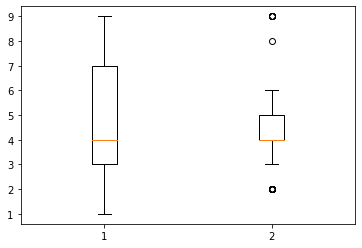

In [58]:
plt.boxplot([df['X'], df['Y']])